In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import LabelEncoder
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")
df_hh = pd.read_csv("./XGboost_archive/hh_demographic.csv")
df_pro = pd.read_csv(r"./XGboost_archive/product.csv")
df_trans = pd.read_csv(r'./XGboost_archive/transaction_data.csv')

In [2]:
df_hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE_DESC             801 non-null    object
 1   MARITAL_STATUS_CODE  801 non-null    object
 2   INCOME_DESC          801 non-null    object
 3   HOMEOWNER_DESC       801 non-null    object
 4   HH_COMP_DESC         801 non-null    object
 5   HOUSEHOLD_SIZE_DESC  801 non-null    object
 6   KID_CATEGORY_DESC    801 non-null    object
 7   household_key        801 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 50.2+ KB


In [3]:
df_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PRODUCT_ID            92353 non-null  int64 
 1   MANUFACTURER          92353 non-null  int64 
 2   DEPARTMENT            92353 non-null  object
 3   BRAND                 92353 non-null  object
 4   COMMODITY_DESC        92353 non-null  object
 5   SUB_COMMODITY_DESC    92353 non-null  object
 6   CURR_SIZE_OF_PRODUCT  92353 non-null  object
dtypes: int64(2), object(5)
memory usage: 4.9+ MB


In [4]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   TRANS_TIME         int64  
 9   WEEK_NO            int64  
 10  COUPON_DISC        float64
 11  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(8)
memory usage: 237.6 MB


In [5]:
df_trans=df_trans.assign(date=(pd.to_datetime('today')+pd.to_timedelta(df_trans.DAY,unit='D')).dt.date)

In [6]:
df_trans = df_trans.rename(columns = {'date':'Date'})
df_trans['Date'] = df_trans['Date'].apply(lambda x: x.replace(year = x.year - 10))
df_trans['Date']

0          2011-01-05
1          2011-01-05
2          2011-01-05
3          2011-01-05
4          2011-01-05
              ...    
2595727    2012-12-16
2595728    2012-12-16
2595729    2012-12-16
2595730    2012-12-16
2595731    2012-12-16
Name: Date, Length: 2595732, dtype: object

In [7]:
df_trans['Date'] = pd.to_datetime(df_trans['Date'], format="%Y-%m-%d ")
import datetime
from dateutil.relativedelta import relativedelta
df_trans["Date"] = df_trans["Date"] + pd.DateOffset(months=1)
df_trans['Date']

0         2011-02-05
1         2011-02-05
2         2011-02-05
3         2011-02-05
4         2011-02-05
             ...    
2595727   2013-01-16
2595728   2013-01-16
2595729   2013-01-16
2595730   2013-01-16
2595731   2013-01-16
Name: Date, Length: 2595732, dtype: datetime64[ns]

In [8]:
df_trans['Date'] = pd.to_datetime(df_trans['Date'])


In [9]:
# df_tr_pr['Date'] = pd.to_datetime(df_tr_pr['Date'], format="%Y-%m-%d ")
df_trans['Year'] = df_trans['Date'].dt.year 
df_trans['Month'] = df_trans['Date'].dt.month 
df_trans['Day'] = df_trans['Date'].dt.month 
print(df_trans)

         household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
0                 2375  26984851472    1     1004906         1         1.39   
1                 2375  26984851472    1     1033142         1         0.82   
2                 2375  26984851472    1     1036325         1         0.99   
3                 2375  26984851472    1     1082185         1         1.21   
4                 2375  26984851472    1     8160430         1         1.50   
...                ...          ...  ...         ...       ...          ...   
2595727           1598  42305362535  711       92130         1         0.99   
2595728           1598  42305362535  711      114102         1         8.89   
2595729           1598  42305362535  711      133449         1         6.99   
2595730           1598  42305362535  711     6923644         1         4.50   
2595731           1598  42305362535  711    14055192         1         6.99   

         STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO

In [10]:
df_trans['Date'] = df_trans['Date'].apply(lambda x : datetime.datetime.strftime(x,"%Y-%m-%d"))

In [11]:
df_trans['Date'].head()

0    2011-02-05
1    2011-02-05
2    2011-02-05
3    2011-02-05
4    2011-02-05
Name: Date, dtype: object

In [12]:
Date_list = df_trans['Date'].tolist()
len(Date_list)

2595732

In [13]:
Mon_Block_list = []
for i in Date_list:
    tem_list = i.split('-')
    if tem_list[0] == '2011':
        a = int(tem_list[1])
        Mon_Block_list.append(a)
    elif tem_list[0] == '2012':
        b = int(tem_list[1]) + 12
        Mon_Block_list.append(b)
    elif tem_list[0] == '2013':
        c = int(tem_list[1]) + 24
        Mon_Block_list.append(c)
len(Mon_Block_list)

2595732

In [14]:
data_dict = {'Mon_Block_num': pd.Series(Mon_Block_list)} # 問題

In [15]:
df_trans['Mon_Block_num'] = pd.DataFrame(data_dict)
df_trans

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,Date,Year,Month,Day,Mon_Block_num
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0,2011-02-05,2011,2,2,2
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0,2011-02-05,2011,2,2,2
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0,2011-02-05,2011,2,2,2
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0,2011-02-05,2011,2,2,2
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0,2011-02-05,2011,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595727,1598,42305362535,711,92130,1,0.99,3228,0.00,1520,102,0.0,0.0,2013-01-16,2013,1,1,25
2595728,1598,42305362535,711,114102,1,8.89,3228,0.00,1520,102,0.0,0.0,2013-01-16,2013,1,1,25
2595729,1598,42305362535,711,133449,1,6.99,3228,0.00,1520,102,0.0,0.0,2013-01-16,2013,1,1,25
2595730,1598,42305362535,711,6923644,1,4.50,3228,-0.49,1520,102,0.0,0.0,2013-01-16,2013,1,1,25


In [16]:
df_trans['Price_per_Q']= pd.Series(df_trans['SALES_VALUE']/df_trans['QUANTITY']).tolist()
df_trans.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,Date,Year,Month,Day,Mon_Block_num,Price_per_Q
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0,2011-02-05,2011,2,2,2,1.39
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0,2011-02-05,2011,2,2,2,0.82
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0,2011-02-05,2011,2,2,2,0.99
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0,2011-02-05,2011,2,2,2,1.21
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0,2011-02-05,2011,2,2,2,1.50


In [17]:
df_tr_pr = pd.merge(df_trans,df_pro, on='PRODUCT_ID')
df_tr_pr.isnull().any()

household_key           False
BASKET_ID               False
DAY                     False
PRODUCT_ID              False
QUANTITY                False
SALES_VALUE             False
STORE_ID                False
RETAIL_DISC             False
TRANS_TIME              False
WEEK_NO                 False
COUPON_DISC             False
COUPON_MATCH_DISC       False
Date                    False
Year                    False
Month                   False
Day                     False
Mon_Block_num           False
Price_per_Q              True
MANUFACTURER            False
DEPARTMENT              False
BRAND                   False
COMMODITY_DESC          False
SUB_COMMODITY_DESC      False
CURR_SIZE_OF_PRODUCT    False
dtype: bool

In [18]:
df_tr_pr[df_tr_pr['SALES_VALUE'] == 0.0]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,Month,Day,Mon_Block_num,Price_per_Q,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
344,2318,28344960308,114,1004906,0,0.0,412,0.00,2248,17,...,5,5,5,NaN,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
819,2318,30407847515,239,1004906,0,0.0,381,0.00,1654,35,...,9,9,9,NaN,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
973,1824,30674013261,244,1004906,0,0.0,318,0.00,1653,36,...,10,10,10,NaN,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1070,1160,30930264626,263,1004906,0,0.0,396,0.00,1852,38,...,10,10,10,NaN,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1845,1617,32478497017,370,1004906,0,0.0,412,0.00,1455,54,...,2,2,14,NaN,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595498,1158,42263562876,709,1115510,0,0.0,410,0.00,2306,102,...,1,1,25,NaN,672,DRUG GM,National,TOBACCO OTHER,CHEWING TOBACCO,
2595542,1314,42276297427,710,6424024,0,0.0,429,0.00,1647,102,...,1,1,25,NaN,1628,COSMETICS,National,MAKEUP AND TREATMENT,LOREAL COSMETICS,
2595585,1907,42276614160,710,17179840,0,0.0,369,0.00,1519,102,...,1,1,25,NaN,895,DRUG GM,Private,EASTER,SEASONAL,
2595621,1240,42289403211,711,17249161,1,0.0,34011,-7.39,1504,102,...,1,1,25,0.0,1628,COSMETICS,National,MAKEUP AND TREATMENT,LOREAL COSMETICS,.13 OZ


In [19]:
df_tr_pr[df_tr_pr['QUANTITY'] == 0.0]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,Month,Day,Mon_Block_num,Price_per_Q,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
344,2318,28344960308,114,1004906,0,0.0,412,0.0,2248,17,...,5,5,5,NaN,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
819,2318,30407847515,239,1004906,0,0.0,381,0.0,1654,35,...,9,9,9,NaN,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
973,1824,30674013261,244,1004906,0,0.0,318,0.0,1653,36,...,10,10,10,NaN,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1070,1160,30930264626,263,1004906,0,0.0,396,0.0,1852,38,...,10,10,10,NaN,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1845,1617,32478497017,370,1004906,0,0.0,412,0.0,1455,54,...,2,2,14,NaN,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595295,1427,42229796833,706,864855,0,0.0,391,0.0,1616,102,...,1,1,25,NaN,5806,COSMETICS,National,FRAGRANCES,DESIGNER FRAGRANCES,
2595498,1158,42263562876,709,1115510,0,0.0,410,0.0,2306,102,...,1,1,25,NaN,672,DRUG GM,National,TOBACCO OTHER,CHEWING TOBACCO,
2595542,1314,42276297427,710,6424024,0,0.0,429,0.0,1647,102,...,1,1,25,NaN,1628,COSMETICS,National,MAKEUP AND TREATMENT,LOREAL COSMETICS,
2595585,1907,42276614160,710,17179840,0,0.0,369,0.0,1519,102,...,1,1,25,NaN,895,DRUG GM,Private,EASTER,SEASONAL,


In [20]:
df_tr_pr = df_tr_pr[df_tr_pr['QUANTITY'] > 0]   # 以大於0的資料取代 並檢查後10個
df_tr_pr['QUANTITY'].sort_values(ascending=True)[:10]

0          1
1662843    1
1662841    1
1662840    1
1662837    1
1662836    1
1662833    1
1662831    1
1662830    1
1662829    1
Name: QUANTITY, dtype: int64

In [21]:
df_tr_pr = df_tr_pr[df_tr_pr['SALES_VALUE'] > 0]   # 以大於0的資料取代 並檢查後10個
df_tr_pr['SALES_VALUE'].sort_values(ascending=True)[:10]

451111     0.01
2338710    0.01
907764     0.01
2426553    0.01
2426552    0.01
2426549    0.01
1929269    0.01
844192     0.01
2402622    0.01
2426547    0.01
Name: SALES_VALUE, dtype: float64

In [22]:
df_tr_pr.groupby("SUB_COMMODITY_DESC").sum()["QUANTITY"].sort_values(ascending=False).head(20)

SUB_COMMODITY_DESC
GASOLINE-REG UNLEADED             257331979
FLUID MILK WHITE ONLY                 91468
YOGURT NOT MULTI-PACKS                66188
SOFT DRINKS 12/18&15PK CAN CAR        55016
SFT DRNK 2 LITER BTL CARB INCL        54432
CANDY BARS (SINGLES)(INCLUDING        46266
SHREDDED CHEESE                       35213
MAINSTREAM WHITE BREAD                34661
CONDENSED SOUP                        32955
SS ECONOMY ENTREES/DINNERS ALL        31664
BANANAS                               31592
SOFT DRINK POWDER POUCHES             29290
POTATO CHIPS                          24223
PASTA: CANNED                         20853
RAMEN NOODLES/RAMEN CUPS              20456
PREMIUM                               20423
BEERALEMALT LIQUORS                   20308
DAIRY CASE 100% PURE JUICE - O        19986
FRZN SS PREMIUM ENTREES/DNRS/N        19582
FRZN BAGGED VEGETABLES - PLAIN        19383
Name: QUANTITY, dtype: int64

In [23]:
df_tr_pr.drop(df_tr_pr[df_tr_pr['SUB_COMMODITY_DESC'] == "GASOLINE-REG UNLEADED"].index,inplace = True)

In [24]:
df_tr_pr.groupby("SUB_COMMODITY_DESC").sum()["QUANTITY"].sort_values(ascending=False).head(20)

SUB_COMMODITY_DESC
FLUID MILK WHITE ONLY             91468
YOGURT NOT MULTI-PACKS            66188
SOFT DRINKS 12/18&15PK CAN CAR    55016
SFT DRNK 2 LITER BTL CARB INCL    54432
CANDY BARS (SINGLES)(INCLUDING    46266
SHREDDED CHEESE                   35213
MAINSTREAM WHITE BREAD            34661
CONDENSED SOUP                    32955
SS ECONOMY ENTREES/DINNERS ALL    31664
BANANAS                           31592
SOFT DRINK POWDER POUCHES         29290
POTATO CHIPS                      24223
PASTA: CANNED                     20853
RAMEN NOODLES/RAMEN CUPS          20456
PREMIUM                           20423
BEERALEMALT LIQUORS               20308
DAIRY CASE 100% PURE JUICE - O    19986
FRZN SS PREMIUM ENTREES/DNRS/N    19582
FRZN BAGGED VEGETABLES - PLAIN    19383
TUNA                              18803
Name: QUANTITY, dtype: int64

In [25]:
df_tr_pr.columns

Index(['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'Date', 'Year', 'Month', 'Day',
       'Mon_Block_num', 'Price_per_Q', 'MANUFACTURER', 'DEPARTMENT', 'BRAND',
       'COMMODITY_DESC', 'SUB_COMMODITY_DESC', 'CURR_SIZE_OF_PRODUCT'],
      dtype='object')

In [26]:
# df_tr_pr.drop(['COUPON_MATCH_DISC','COUPON_DISC','DAY','CURR_SIZE_OF_PRODUCT','TRANS_TIME','CURR_SIZE_OF_PRODUCT'],axis = 1)

In [27]:
df_tr_pr["SUB_COMMODITY_DESC"].replace({'SFT DRNK 2 LITER BTL CARB INCL':'SOFT DRINK INCL', 'SOFT DRINKS 12/18&15PK CAN CAR':'SOFT DRINKS CAN','SS ECONOMY ENTREES/DINNERS ALL':'ECONOMY ENTREES DINNERS','PASTA: CANNED':'PASTA CANNED','PREMIUM':'ICE CREAM','DAIRY CASE 100% PURE JUICE - O':'100% PURE JUICE','BEERALEMALT LIQUORS':'BEER','FRZN SS PREMIUM ENTREES/DNRS/N':'PREMIUM ENTREES',
                                  'FRZN BAGGED VEGETABLES - PLAIN':'VEGETABLES -PLAIN','CANDY BARS (SINGLES)(INCLUDING':'CANDY BARS'}, inplace=True)
df_tr_pr["SUB_COMMODITY_DESC"]    # 替換資料名稱for爬蟲

0          POTATOES RUSSET (BULK&BAG)
1          POTATOES RUSSET (BULK&BAG)
2          POTATOES RUSSET (BULK&BAG)
3          POTATOES RUSSET (BULK&BAG)
4          POTATOES RUSSET (BULK&BAG)
                      ...            
2595727     MARGARINE: TUBS AND BOWLS
2595728                          BEER
2595729                          BEER
2595730                          BEER
2595731                          BEER
Name: SUB_COMMODITY_DESC, Length: 2551853, dtype: object

In [28]:
df_tr_pr.groupby("SUB_COMMODITY_DESC").sum()["QUANTITY"].sort_values(ascending=False).head(20)

SUB_COMMODITY_DESC
FLUID MILK WHITE ONLY        91468
YOGURT NOT MULTI-PACKS       66188
SOFT DRINKS CAN              55016
SOFT DRINK INCL              54432
CANDY BARS                   46266
SHREDDED CHEESE              35213
MAINSTREAM WHITE BREAD       34661
CONDENSED SOUP               32955
ECONOMY ENTREES DINNERS      31664
BANANAS                      31592
SOFT DRINK POWDER POUCHES    29290
POTATO CHIPS                 24223
PASTA CANNED                 20853
RAMEN NOODLES/RAMEN CUPS     20456
ICE CREAM                    20423
BEER                         20308
100% PURE JUICE              19986
PREMIUM ENTREES              19582
VEGETABLES -PLAIN            19383
TUNA                         18803
Name: QUANTITY, dtype: int64

In [29]:
df_tr_pr.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,Month,Day,Mon_Block_num,Price_per_Q,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2375,26984851472,1,1004906,1,1.39,364,-0.6,1631,1,...,2,2,2,1.39,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1,1929,27021022215,4,1004906,1,1.39,441,-0.6,1755,1,...,2,2,2,1.39,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
2,568,27021090189,4,1004906,1,1.39,446,-0.6,35,1,...,2,2,2,1.39,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
3,887,27031467254,5,1004906,1,1.39,298,-0.6,1551,1,...,2,2,2,1.39,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
4,175,27057508267,7,1004906,1,1.99,446,0.0,2303,2,...,2,2,2,1.99,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB


In [30]:
df_tr_pr['SALES_VALUE'].sort_values(ascending=False)[:5]

2379358    840.00
1417877    631.80
845032     505.00
2483063    499.99
845031     455.00
Name: SALES_VALUE, dtype: float64

In [31]:
df_tr_pr[df_tr_pr['SALES_VALUE'] == 840.00]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,Month,Day,Mon_Block_num,Price_per_Q,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
2379358,1609,32006114302,339,12484608,3,840.0,412,0.0,2038,49,...,1,1,13,280.0,903,MISC SALES TRAN,Private,COUPON/MISC ITEMS,ELECTRONIC GIFT CARDS ACTIVATI,


In [32]:
df_tr_pr[df_tr_pr['PRODUCT_ID'] == 12484608]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,Month,Day,Mon_Block_num,Price_per_Q,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
2379334,57,30130200228,219,12484608,1,20.0,318,0.0,714,32,...,9,9,9,20.0,903,MISC SALES TRAN,Private,COUPON/MISC ITEMS,ELECTRONIC GIFT CARDS ACTIVATI,
2379335,464,30532545665,234,12484608,1,20.0,306,0.0,1133,34,...,9,9,9,20.0,903,MISC SALES TRAN,Private,COUPON/MISC ITEMS,ELECTRONIC GIFT CARDS ACTIVATI,
2379336,1823,30628001155,241,12484608,1,10.0,402,0.0,1344,35,...,10,10,10,10.0,903,MISC SALES TRAN,Private,COUPON/MISC ITEMS,ELECTRONIC GIFT CARDS ACTIVATI,
2379337,744,30793290860,253,12484608,1,25.0,365,0.0,1256,37,...,10,10,10,25.0,903,MISC SALES TRAN,Private,COUPON/MISC ITEMS,ELECTRONIC GIFT CARDS ACTIVATI,
2379338,752,30943226699,264,12484608,1,100.0,356,0.0,1419,38,...,10,10,10,100.0,903,MISC SALES TRAN,Private,COUPON/MISC ITEMS,ELECTRONIC GIFT CARDS ACTIVATI,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2379422,2470,41970921417,687,12484608,2,40.0,304,0.0,1705,99,...,12,12,24,20.0,903,MISC SALES TRAN,Private,COUPON/MISC ITEMS,ELECTRONIC GIFT CARDS ACTIVATI,
2379423,2199,41996437636,689,12484608,1,50.0,439,0.0,1810,99,...,12,12,24,50.0,903,MISC SALES TRAN,Private,COUPON/MISC ITEMS,ELECTRONIC GIFT CARDS ACTIVATI,
2379424,2262,42063041036,694,12484608,1,15.0,446,0.0,1450,100,...,12,12,24,15.0,903,MISC SALES TRAN,Private,COUPON/MISC ITEMS,ELECTRONIC GIFT CARDS ACTIVATI,
2379425,104,42115490467,698,12484608,1,15.0,421,0.0,1030,100,...,1,1,25,15.0,903,MISC SALES TRAN,Private,COUPON/MISC ITEMS,ELECTRONIC GIFT CARDS ACTIVATI,


In [33]:
df_tr_pr.drop(df_tr_pr[df_tr_pr['COMMODITY_DESC'] == "COUPON/MISC ITEMS"].index,inplace = True) # 因為原始資料我們並不使用折扣卷資料故刪除

In [34]:
df_tr_pr['SALES_VALUE'].sort_values(ascending=False)[:5]

1417877    631.80
845032     505.00
2483063    499.99
845031     455.00
845030     430.00
Name: SALES_VALUE, dtype: float64

In [35]:
df_tr_pr[df_tr_pr['SALES_VALUE'] == 631.80]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,Month,Day,Mon_Block_num,Price_per_Q,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
1417877,346,40387571385,574,948670,5,631.8,415,0.0,1312,83,...,9,9,21,126.36,2,DRUG GM,National,TICKETS,TICKETS,


In [36]:
df_tr_pr[df_tr_pr['PRODUCT_ID'] == 948670]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,Month,Day,Mon_Block_num,Price_per_Q,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
1417369,114,27266745486,24,948670,1,7.40,31401,0.0,1258,4,...,2,2,2,7.40,2,DRUG GM,National,TICKETS,TICKETS,
1417370,405,27353086254,33,948670,1,7.40,361,0.0,1255,5,...,3,3,3,7.40,2,DRUG GM,National,TICKETS,TICKETS,
1417371,1914,27398600223,35,948670,1,7.40,448,0.0,948,6,...,3,3,3,7.40,2,DRUG GM,National,TICKETS,TICKETS,
1417372,239,27442921064,40,948670,1,2.22,388,0.0,1254,6,...,3,3,3,2.22,2,DRUG GM,National,TICKETS,TICKETS,
1417373,256,27443128559,40,948670,1,7.40,424,0.0,1910,6,...,3,3,3,7.40,2,DRUG GM,National,TICKETS,TICKETS,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418027,2083,42229581285,706,948670,2,15.60,339,0.0,1610,102,...,1,1,25,7.80,2,DRUG GM,National,TICKETS,TICKETS,
1418028,1915,42250897707,708,948670,1,7.80,369,0.0,2116,102,...,1,1,25,7.80,2,DRUG GM,National,TICKETS,TICKETS,
1418029,1556,42276445448,710,948670,1,7.80,436,0.0,1047,102,...,1,1,25,7.80,2,DRUG GM,National,TICKETS,TICKETS,
1418030,1430,42289355942,711,948670,1,7.80,31742,0.0,1310,102,...,1,1,25,7.80,2,DRUG GM,National,TICKETS,TICKETS,


In [37]:
df_tr_pr['Price_per_Q'].describe()

count    2.547326e+06
mean     2.445842e+00
std      2.617876e+00
min      1.000000e-02
25%      1.000000e+00
50%      1.990000e+00
75%      2.990000e+00
max      4.999900e+02
Name: Price_per_Q, dtype: float64

In [38]:
df_tr_pr.groupby("COMMODITY_DESC").sum()["QUANTITY"].sort_values(ascending=False)

COMMODITY_DESC
SOFT DRINKS                     160630
FLUID MILK PRODUCTS             116184
BAKED BREAD/BUNS/ROLLS           99702
CHEESE                           96363
SOUP                             85689
                                 ...  
NDAIRY/TEAS/JUICE/SOD                4
EASTER LILY                          2
MISCELLANEOUS CROUTONS               1
MISCELLANEOUS(CORP USE ONLY)         1
FROZEN PACKAGE MEAT                  1
Name: QUANTITY, Length: 305, dtype: int64

In [39]:
df_tr_pr.groupby("SUB_COMMODITY_DESC").sum()["QUANTITY"].sort_values(ascending=False)

SUB_COMMODITY_DESC
FLUID MILK WHITE ONLY           91468
YOGURT NOT MULTI-PACKS          66188
SOFT DRINKS CAN                 55016
SOFT DRINK INCL                 54432
CANDY BARS                      46266
                                ...  
SV BEV: TEA                         1
CONTINUITY: TOYS                    1
HANDHELD EQUIPMENT                  1
COOKIES: LESS THAN 6                1
*ATH ACCES:TOWEL BARS/SOAP D        1
Name: QUANTITY, Length: 2363, dtype: int64

In [40]:
df_tr_pr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2547326 entries, 0 to 2595731
Data columns (total 24 columns):
 #   Column                Dtype  
---  ------                -----  
 0   household_key         int64  
 1   BASKET_ID             int64  
 2   DAY                   int64  
 3   PRODUCT_ID            int64  
 4   QUANTITY              int64  
 5   SALES_VALUE           float64
 6   STORE_ID              int64  
 7   RETAIL_DISC           float64
 8   TRANS_TIME            int64  
 9   WEEK_NO               int64  
 10  COUPON_DISC           float64
 11  COUPON_MATCH_DISC     float64
 12  Date                  object 
 13  Year                  int64  
 14  Month                 int64  
 15  Day                   int64  
 16  Mon_Block_num         int64  
 17  Price_per_Q           float64
 18  MANUFACTURER          int64  
 19  DEPARTMENT            object 
 20  BRAND                 object 
 21  COMMODITY_DESC        object 
 22  SUB_COMMODITY_DESC    object 
 23  CURR_SI

In [41]:
df = pd.merge(df_tr_pr,df_hh, on='household_key') # 合併共三個資料集並確認是否有空值
df.isnull().any()

household_key           False
BASKET_ID               False
DAY                     False
PRODUCT_ID              False
QUANTITY                False
SALES_VALUE             False
STORE_ID                False
RETAIL_DISC             False
TRANS_TIME              False
WEEK_NO                 False
COUPON_DISC             False
COUPON_MATCH_DISC       False
Date                    False
Year                    False
Month                   False
Day                     False
Mon_Block_num           False
Price_per_Q             False
MANUFACTURER            False
DEPARTMENT              False
BRAND                   False
COMMODITY_DESC          False
SUB_COMMODITY_DESC      False
CURR_SIZE_OF_PRODUCT    False
AGE_DESC                False
MARITAL_STATUS_CODE     False
INCOME_DESC             False
HOMEOWNER_DESC          False
HH_COMP_DESC            False
HOUSEHOLD_SIZE_DESC     False
KID_CATEGORY_DESC       False
dtype: bool

In [42]:
df

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
0,1929,27021022215,4,1004906,1,1.39,441,-0.60,1755,1,...,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,35-44,B,25-34K,Homeowner,Single Male,1,None/Unknown
1,1929,27601005106,52,1004906,1,1.99,441,0.00,1917,8,...,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,35-44,B,25-34K,Homeowner,Single Male,1,None/Unknown
2,1929,28110785584,95,1004906,1,1.00,292,-0.99,1104,14,...,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,35-44,B,25-34K,Homeowner,Single Male,1,None/Unknown
3,1929,30032381853,202,1004906,1,2.99,441,0.00,1823,30,...,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,35-44,B,25-34K,Homeowner,Single Male,1,None/Unknown
4,1929,30035429101,207,1004906,1,2.99,292,0.00,2201,30,...,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,35-44,B,25-34K,Homeowner,Single Male,1,None/Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399436,2364,42233246043,706,2000699,1,2.43,673,0.00,1753,102,...,MEAT - SHELF STABLE,HASH: CANNED,15 OZ,45-54,A,25-34K,Renter,2 Adults No Kids,2,None/Unknown
1399437,2364,42233246043,706,2022006,2,0.72,673,0.00,1753,102,...,DRY MIX DESSERTS,GELATIN,.3 OZ,45-54,A,25-34K,Renter,2 Adults No Kids,2,None/Unknown
1399438,2364,42233246043,706,2043340,1,1.00,673,-0.18,1753,102,...,VEGETABLES - SHELF STABLE,BEANS GREEN: FS/WHL/CUT,14.5 OZ,45-54,A,25-34K,Renter,2 Adults No Kids,2,None/Unknown
1399439,2364,42233246043,706,2058243,1,1.25,673,-0.40,1753,102,...,SOUP,RTS SOUP: CHUNKY/HOMESTYLE ET,19 OZ,45-54,A,25-34K,Renter,2 Adults No Kids,2,None/Unknown


In [43]:
df.drop(["COUPON_DISC",'COUPON_MATCH_DISC'], axis=1,inplace=True)

In [44]:
df.dtypes.value_counts()

object     13
int64      13
float64     3
dtype: int64

In [45]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']=df['Date'].astype('int64')  # 轉變型態  (這邊還在考慮是否要丟棄這欄位)

In [46]:
if 'QUANTITY' in df:
    df2 = df.drop(['QUANTITY'] , axis=1) # df2為先把目標值移除的資料


#只取 int64, float64 兩種數值型欄位, 存於 num_features 中, 其他類別存於notnum_features
num_features = []
notnum_features = []
for dtype, feature in zip(df2.dtypes, df2.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
    else:
        notnum_features.append(feature)

print(f'lehgth of all featrues : {len(df2.columns)}\n')
print(f'length of Numeric Features : {len(num_features)}\n Numeric Features : {num_features}\n')
print(f'length of Not Numeric Features : {len(notnum_features)}\n Not Numeric Features : {notnum_features}')

# 削減文字型欄位, 只剩數值型欄位
df_train_num = df[num_features]
df_train_num.head()

lehgth of all featrues : 28

length of Numeric Features : 16
 Numeric Features : ['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO', 'Date', 'Year', 'Month', 'Day', 'Mon_Block_num', 'Price_per_Q', 'MANUFACTURER']

length of Not Numeric Features : 12
 Not Numeric Features : ['DEPARTMENT', 'BRAND', 'COMMODITY_DESC', 'SUB_COMMODITY_DESC', 'CURR_SIZE_OF_PRODUCT', 'AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOMEOWNER_DESC', 'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC']


,household_key,BASKET_ID,DAY,PRODUCT_ID,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,Date,Year,Month,Day,Mon_Block_num,Price_per_Q,MANUFACTURER
0,1929,27021022215,4,1004906,1.39,441,-0.60,1755,1,1297123200000000000,2011,2,2,2,1.39,69
1,1929,27601005106,52,1004906,1.99,441,0.00,1917,8,1301011200000000000,2011,3,3,3,1.99,69
2,1929,28110785584,95,1004906,1.00,292,-0.99,1104,14,1304899200000000000,2011,5,5,5,1.00,69
3,1929,30032381853,202,1004906,2.99,441,0.00,1823,30,1314230400000000000,2011,8,8,8,2.99,69
4,1929,30035429101,207,1004906,2.99,292,0.00,2201,30,1314662400000000000,2011,8,8,8,2.99,69


In [47]:
# LabelEncoder().fit_transform(df[df.columns[df.dtypes == object]]) 這行註解
df3 = pd.DataFrame()
for i in notnum_features:  
    df3[i] = LabelEncoder().fit_transform(df2[i]) # 創一個新df , 將原先df在非數值型資料給轉化並寫入(label encoding)
df3

,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
0,25,1,228,1605,2432,2,1,6,0,4,0,3
1,25,1,228,1605,2432,2,1,6,0,4,0,3
2,25,1,228,1605,2432,2,1,6,0,4,0,3
3,25,1,228,1605,2432,2,1,6,0,4,0,3
4,25,1,228,1605,2432,2,1,6,0,4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1399436,13,0,185,969,912,3,0,6,3,2,1,3
1399437,13,1,95,858,49,3,0,6,3,2,1,3
1399438,13,0,294,187,865,3,0,6,3,2,1,3
1399439,13,0,268,1772,1149,3,0,6,3,2,1,3


In [48]:
# df3 = pd.DataFrame()
# for i in notnum_features:
#     df3[i] = df2[i]     # 提供one hot encoding 寫法 , 如果不經由先label就執行這個就好
#     df3 = pd.get_dummies(df3)
# df3

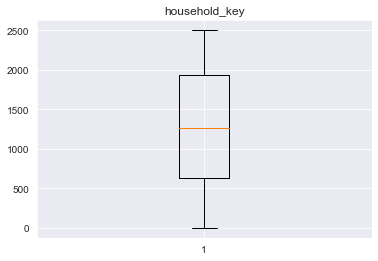

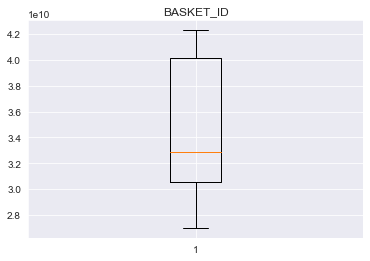

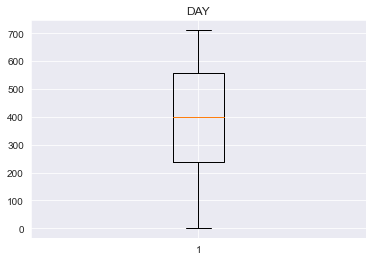

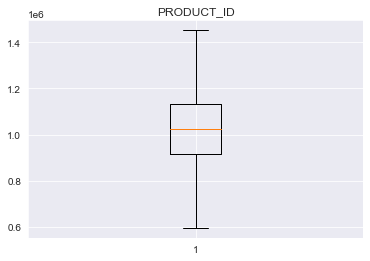

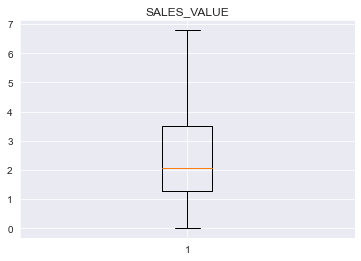

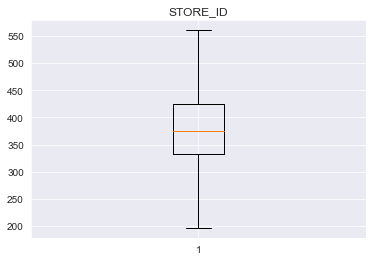

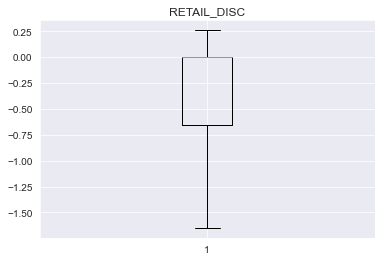

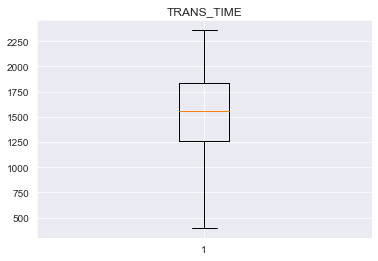

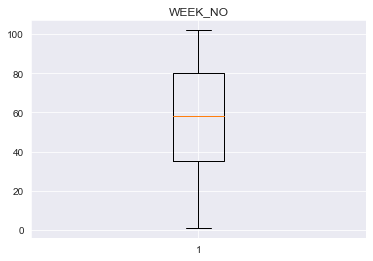

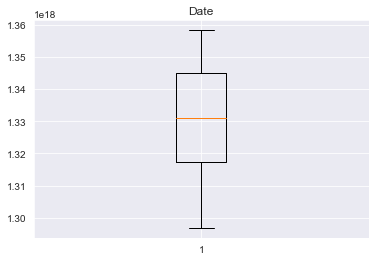

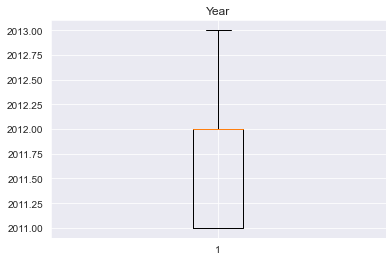

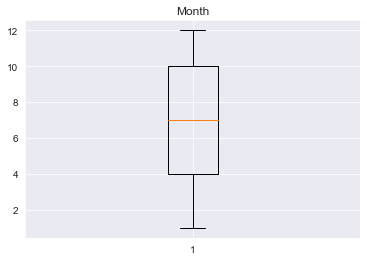

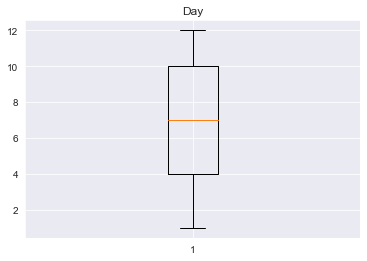

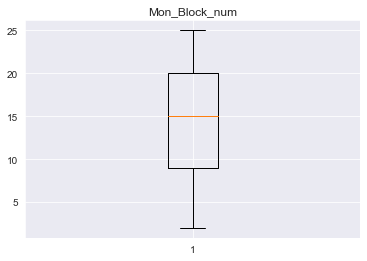

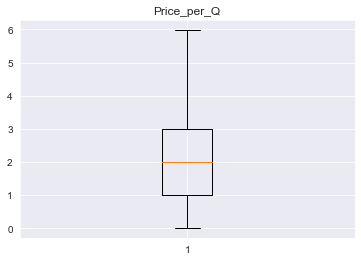

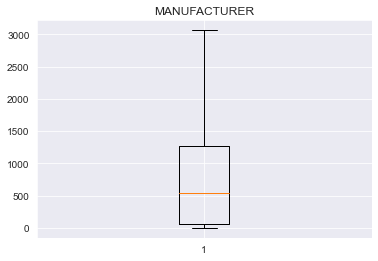

In [49]:
for i,f in enumerate(num_features):   # 檢查各資料的離群值 (前面已經有drop一些資料)  (以箱型圖顯示)
    ori_series = df2[f].copy()         # 假設有離群值,利用 "np.log1p" 去除偏態
    qt1 = ori_series.quantile(q=0.25)
    qt3 = ori_series.quantile(q=0.75)
    iqr = qt3-qt1
    ori_series[ori_series>(qt3 + 1.5*iqr)] = qt3 + 1.5*iqr
    ori_series[ori_series<(qt1 - 1.5*iqr)] = qt1 - 1.5*iqr
    #--------------------------------------------------------#
    plt.title(f) 
    plt.boxplot(ori_series)
    plt.show()

In [50]:
#哪些機器學習演算法不需要（需要）做歸一化？
#概率模型（樹形模型）不需要歸一化，因為它們不關心變數的值，而是關心變數的分佈和變數之間的條件概率，如決策樹、RF。 而像Adaboost、SVM、LR、Knn、KMeans之類的最優化問題就需要歸一化。

from sklearn.preprocessing import StandardScaler  # 這邊做標準化（Z-Score）創新df 將數值型資料寫入並轉換 (這邊為ndarray)

df4 = pd.DataFrame()
for i in num_features:    
    df4[i] = df2[i]
scaler = StandardScaler().fit(df4)
df4 = scaler.transform(df4)    
df4    

array([[ 0.8878202 , -1.52225632, -2.09065589, ..., -2.05135579,
        -0.42794608, -0.69089488],
       [ 0.8878202 , -1.39835527, -1.83381737, ..., -1.88879867,
        -0.19063053, -0.69089488],
       [ 0.8878202 , -1.28945149, -1.60373287, ..., -1.56368444,
        -0.58220118, -0.69089488],
       ...,
       [ 1.47444797,  1.72751262,  1.66560741, ...,  1.68745794,
        -0.58220118, -0.5359689 ],
       [ 1.47444797,  1.72751262,  1.66560741, ...,  1.68745794,
        -0.4833197 , -0.09373887],
       [ 1.47444797,  1.72751262,  1.66560741, ...,  1.68745794,
         2.53849825,  2.84912743]])

In [51]:
df4_normal = pd.DataFrame(df4,columns=num_features) # 利用數值型資料關係對應欄位將 'ndarray' 轉為 'Dataframe'  ID,year置換 時間週期
df4_normal

,household_key,BASKET_ID,DAY,PRODUCT_ID,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,Date,Year,Month,Day,Mon_Block_num,Price_per_Q,MANUFACTURER
0,0.887820,-1.522256,-2.090656,-0.488174,-0.490114,-0.316005,-0.057493,0.536630,-2.100298,-2.085177,-1.191017,-1.500729,-1.500729,-2.051356,-0.427946,-0.690895
1,0.887820,-1.398355,-1.833817,-0.488174,-0.297540,-0.316005,0.433094,0.957210,-1.838098,-1.844998,-1.191017,-1.202651,-1.202651,-1.888799,-0.190631,-0.690895
2,0.887820,-1.289451,-1.603733,-0.488174,-0.615287,-0.332087,-0.376375,-1.153479,-1.613356,-1.604818,-1.191017,-0.606496,-0.606496,-1.563684,-0.582201,-0.690895
3,0.887820,-0.878943,-1.031197,-0.488174,0.023416,-0.316005,0.433094,0.713170,-1.014043,-1.028387,-1.191017,0.287737,0.287737,-1.076013,0.204895,-0.690895
4,0.887820,-0.878292,-1.004443,-0.488174,0.023416,-0.332087,0.433094,1.694523,-1.014043,-1.001701,-1.191017,0.287737,0.287737,-1.076013,0.204895,-0.690895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399436,1.474448,1.727513,1.665607,-0.232329,-0.156319,-0.290964,0.433094,0.531437,1.682864,1.666962,2.577725,-1.798806,-1.798806,1.687458,-0.016599,-0.173020
1399437,1.474448,1.727513,1.665607,-0.226855,-0.705155,-0.290964,0.433094,0.531437,1.682864,1.666962,2.577725,-1.798806,-1.798806,1.687458,-0.835338,-0.690895
1399438,1.474448,1.727513,1.665607,-0.221374,-0.615287,-0.290964,0.285918,0.531437,1.682864,1.666962,2.577725,-1.798806,-1.798806,1.687458,-0.582201,-0.535969
1399439,1.474448,1.727513,1.665607,-0.217545,-0.535048,-0.290964,0.106036,0.531437,1.682864,1.666962,2.577725,-1.798806,-1.798806,1.687458,-0.483320,-0.093739


In [52]:
df5 = pd.concat([df3,df4_normal],axis=1)  # 數值型資料(已經normalization)與非數值型資料(已經label encoding)去做合併
df5

,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,...,RETAIL_DISC,TRANS_TIME,WEEK_NO,Date,Year,Month,Day,Mon_Block_num,Price_per_Q,MANUFACTURER
0,25,1,228,1605,2432,2,1,6,0,4,...,-0.057493,0.536630,-2.100298,-2.085177,-1.191017,-1.500729,-1.500729,-2.051356,-0.427946,-0.690895
1,25,1,228,1605,2432,2,1,6,0,4,...,0.433094,0.957210,-1.838098,-1.844998,-1.191017,-1.202651,-1.202651,-1.888799,-0.190631,-0.690895
2,25,1,228,1605,2432,2,1,6,0,4,...,-0.376375,-1.153479,-1.613356,-1.604818,-1.191017,-0.606496,-0.606496,-1.563684,-0.582201,-0.690895
3,25,1,228,1605,2432,2,1,6,0,4,...,0.433094,0.713170,-1.014043,-1.028387,-1.191017,0.287737,0.287737,-1.076013,0.204895,-0.690895
4,25,1,228,1605,2432,2,1,6,0,4,...,0.433094,1.694523,-1.014043,-1.001701,-1.191017,0.287737,0.287737,-1.076013,0.204895,-0.690895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399436,13,0,185,969,912,3,0,6,3,2,...,0.433094,0.531437,1.682864,1.666962,2.577725,-1.798806,-1.798806,1.687458,-0.016599,-0.173020
1399437,13,1,95,858,49,3,0,6,3,2,...,0.433094,0.531437,1.682864,1.666962,2.577725,-1.798806,-1.798806,1.687458,-0.835338,-0.690895
1399438,13,0,294,187,865,3,0,6,3,2,...,0.285918,0.531437,1.682864,1.666962,2.577725,-1.798806,-1.798806,1.687458,-0.582201,-0.535969
1399439,13,0,268,1772,1149,3,0,6,3,2,...,0.106036,0.531437,1.682864,1.666962,2.577725,-1.798806,-1.798806,1.687458,-0.483320,-0.093739


In [53]:
df5.columns

Index(['DEPARTMENT', 'BRAND', 'COMMODITY_DESC', 'SUB_COMMODITY_DESC',
       'CURR_SIZE_OF_PRODUCT', 'AGE_DESC', 'MARITAL_STATUS_CODE',
       'INCOME_DESC', 'HOMEOWNER_DESC', 'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC',
       'KID_CATEGORY_DESC', 'household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'Date', 'Year', 'Month', 'Day', 'Mon_Block_num', 'Price_per_Q',
       'MANUFACTURER'],
      dtype='object')

In [54]:
df6 = pd.DataFrame()  
df6['QUANTITY'] = df['QUANTITY']  # 將原本的目標值取回
df6

,QUANTITY
0,1
1,1
2,1
3,1
4,1
...,...
1399436,1
1399437,2
1399438,1
1399439,1


In [55]:
df_con = pd.concat([df5,df6],axis=1)
df_con

,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,...,TRANS_TIME,WEEK_NO,Date,Year,Month,Day,Mon_Block_num,Price_per_Q,MANUFACTURER,QUANTITY
0,25,1,228,1605,2432,2,1,6,0,4,...,0.536630,-2.100298,-2.085177,-1.191017,-1.500729,-1.500729,-2.051356,-0.427946,-0.690895,1
1,25,1,228,1605,2432,2,1,6,0,4,...,0.957210,-1.838098,-1.844998,-1.191017,-1.202651,-1.202651,-1.888799,-0.190631,-0.690895,1
2,25,1,228,1605,2432,2,1,6,0,4,...,-1.153479,-1.613356,-1.604818,-1.191017,-0.606496,-0.606496,-1.563684,-0.582201,-0.690895,1
3,25,1,228,1605,2432,2,1,6,0,4,...,0.713170,-1.014043,-1.028387,-1.191017,0.287737,0.287737,-1.076013,0.204895,-0.690895,1
4,25,1,228,1605,2432,2,1,6,0,4,...,1.694523,-1.014043,-1.001701,-1.191017,0.287737,0.287737,-1.076013,0.204895,-0.690895,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399436,13,0,185,969,912,3,0,6,3,2,...,0.531437,1.682864,1.666962,2.577725,-1.798806,-1.798806,1.687458,-0.016599,-0.173020,1
1399437,13,1,95,858,49,3,0,6,3,2,...,0.531437,1.682864,1.666962,2.577725,-1.798806,-1.798806,1.687458,-0.835338,-0.690895,2
1399438,13,0,294,187,865,3,0,6,3,2,...,0.531437,1.682864,1.666962,2.577725,-1.798806,-1.798806,1.687458,-0.582201,-0.535969,1
1399439,13,0,268,1772,1149,3,0,6,3,2,...,0.531437,1.682864,1.666962,2.577725,-1.798806,-1.798806,1.687458,-0.483320,-0.093739,1


In [56]:
df_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399441 entries, 0 to 1399440
Data columns (total 29 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   DEPARTMENT            1399441 non-null  int32  
 1   BRAND                 1399441 non-null  int32  
 2   COMMODITY_DESC        1399441 non-null  int32  
 3   SUB_COMMODITY_DESC    1399441 non-null  int32  
 4   CURR_SIZE_OF_PRODUCT  1399441 non-null  int32  
 5   AGE_DESC              1399441 non-null  int32  
 6   MARITAL_STATUS_CODE   1399441 non-null  int32  
 7   INCOME_DESC           1399441 non-null  int32  
 8   HOMEOWNER_DESC        1399441 non-null  int32  
 9   HH_COMP_DESC          1399441 non-null  int32  
 10  HOUSEHOLD_SIZE_DESC   1399441 non-null  int32  
 11  KID_CATEGORY_DESC     1399441 non-null  int32  
 12  household_key         1399441 non-null  float64
 13  BASKET_ID             1399441 non-null  float64
 14  DAY                   1399441 non-

In [57]:
corr = df_con.corr()
corr['QUANTITY']

DEPARTMENT             -0.004124
BRAND                   0.010942
COMMODITY_DESC          0.031261
SUB_COMMODITY_DESC      0.012577
CURR_SIZE_OF_PRODUCT    0.013381
AGE_DESC                0.008000
MARITAL_STATUS_CODE     0.005983
INCOME_DESC             0.008706
HOMEOWNER_DESC          0.006918
HH_COMP_DESC           -0.008904
HOUSEHOLD_SIZE_DESC     0.009269
KID_CATEGORY_DESC      -0.005301
household_key           0.005490
BASKET_ID               0.000124
DAY                     0.001874
PRODUCT_ID             -0.031491
SALES_VALUE             0.199590
STORE_ID               -0.011263
RETAIL_DISC            -0.240456
TRANS_TIME             -0.007405
WEEK_NO                 0.001906
Date                    0.001874
Year                    0.002552
Month                  -0.001555
Day                    -0.001555
Mon_Block_num           0.001794
Price_per_Q            -0.135742
MANUFACTURER           -0.023147
QUANTITY                1.000000
Name: QUANTITY, dtype: float64

In [58]:
df_con.columns

Index(['DEPARTMENT', 'BRAND', 'COMMODITY_DESC', 'SUB_COMMODITY_DESC',
       'CURR_SIZE_OF_PRODUCT', 'AGE_DESC', 'MARITAL_STATUS_CODE',
       'INCOME_DESC', 'HOMEOWNER_DESC', 'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC',
       'KID_CATEGORY_DESC', 'household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'Date', 'Year', 'Month', 'Day', 'Mon_Block_num', 'Price_per_Q',
       'MANUFACTURER', 'QUANTITY'],
      dtype='object')

In [59]:
from sklearn.feature_selection import SelectKBest   # 這邊利用sklearn,f_regression 選擇器去自動選擇我們需要的特徵數
from sklearn.feature_selection import f_regression
selectKBest = SelectKBest(f_regression,k=5)
feature =df_con[['CURR_SIZE_OF_PRODUCT','TRANS_TIME','COMMODITY_DESC','WEEK_NO','Price_per_Q','DAY','BASKET_ID','MARITAL_STATUS_CODE','INCOME_DESC','HOMEOWNER_DESC','HH_COMP_DESC','HOUSEHOLD_SIZE_DESC','KID_CATEGORY_DESC','Mon_Block_num','Day','Month','Year','household_key','PRODUCT_ID','SALES_VALUE','STORE_ID','Date','DEPARTMENT','BRAND','SUB_COMMODITY_DESC','AGE_DESC']]
bestFeature =selectKBest.fit_transform(feature,df_con['QUANTITY'])
feature.columns[selectKBest.get_support()]

Index(['CURR_SIZE_OF_PRODUCT', 'COMMODITY_DESC', 'Price_per_Q', 'PRODUCT_ID',
       'SALES_VALUE'],
      dtype='object')

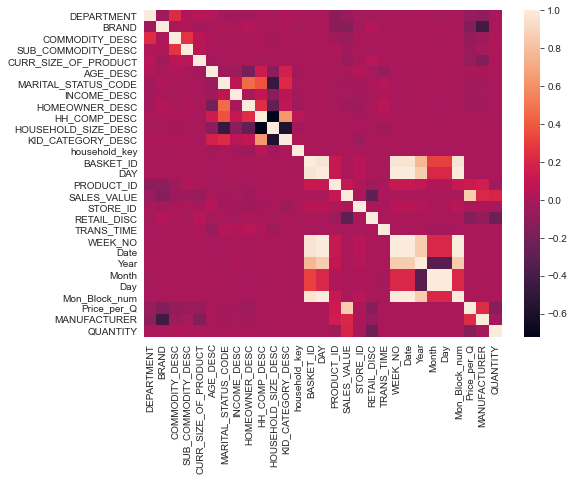

In [60]:
corr = df_con.corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr)
plt.show()

In [61]:
df_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399441 entries, 0 to 1399440
Data columns (total 29 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   DEPARTMENT            1399441 non-null  int32  
 1   BRAND                 1399441 non-null  int32  
 2   COMMODITY_DESC        1399441 non-null  int32  
 3   SUB_COMMODITY_DESC    1399441 non-null  int32  
 4   CURR_SIZE_OF_PRODUCT  1399441 non-null  int32  
 5   AGE_DESC              1399441 non-null  int32  
 6   MARITAL_STATUS_CODE   1399441 non-null  int32  
 7   INCOME_DESC           1399441 non-null  int32  
 8   HOMEOWNER_DESC        1399441 non-null  int32  
 9   HH_COMP_DESC          1399441 non-null  int32  
 10  HOUSEHOLD_SIZE_DESC   1399441 non-null  int32  
 11  KID_CATEGORY_DESC     1399441 non-null  int32  
 12  household_key         1399441 non-null  float64
 13  BASKET_ID             1399441 non-null  float64
 14  DAY                   1399441 non-

In [62]:
df_con_drop = pd.DataFrame(df_con,columns=feature.columns[selectKBest.get_support()]) # 只選取上述篩選的特徵
df_con_drop

,CURR_SIZE_OF_PRODUCT,COMMODITY_DESC,Price_per_Q,PRODUCT_ID,SALES_VALUE
0,2432,228,-0.427946,-0.488174,-0.490114
1,2432,228,-0.190631,-0.488174,-0.297540
2,2432,228,-0.582201,-0.488174,-0.615287
3,2432,228,0.204895,-0.488174,0.023416
4,2432,228,0.204895,-0.488174,0.023416
...,...,...,...,...,...
1399436,912,185,-0.016599,-0.232329,-0.156319
1399437,49,95,-0.835338,-0.226855,-0.705155
1399438,865,294,-0.582201,-0.221374,-0.615287
1399439,1149,268,-0.483320,-0.217545,-0.535048


In [63]:
df_con_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399441 entries, 0 to 1399440
Data columns (total 5 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   CURR_SIZE_OF_PRODUCT  1399441 non-null  int32  
 1   COMMODITY_DESC        1399441 non-null  int32  
 2   Price_per_Q           1399441 non-null  float64
 3   PRODUCT_ID            1399441 non-null  float64
 4   SALES_VALUE           1399441 non-null  float64
dtypes: float64(3), int32(2)
memory usage: 42.7 MB


In [64]:
cols = feature.columns[selectKBest.get_support()]

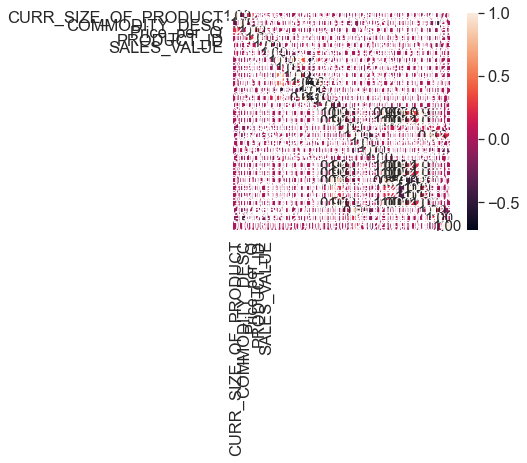

In [65]:

cm = np.corrcoef(df_con[cols].values.T)
sns.set(font_scale = 1.5)
hm = sns.heatmap(corr,cbar=True,annot=True,square=True,fmt=".2f",annot_kws={"size":15},yticklabels=cols,xticklabels=cols)
plt.show()

In [66]:
# df_con_drop['CURR_SIZE_OF_PRODUCT']=df_con_drop['CURR_SIZE_OF_PRODUCT'].astype('object')
# df_con_drop['COMMODITY_DESC']=df_con_drop['COMMODITY_DESC'].astype('object')
# df_con_drop['HH_COMP_DESC']=df_con_drop['HH_COMP_DESC'].astype('object')
# df_con_drop['HOUSEHOLD_SIZE_DESC']=df_con_drop['HOUSEHOLD_SIZE_DESC'].astype('object')
# df_con_drop['BRAND']=df_con_drop['BRAND'].astype('object')
# df_con_drop['SUB_COMMODITY_DESC']=df_con_drop['SUB_COMMODITY_DESC'].astype('object')

df_con_drop.info()  # 這邊將原先非數值資料再轉回物件屬性才可以去做onehot

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399441 entries, 0 to 1399440
Data columns (total 5 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   CURR_SIZE_OF_PRODUCT  1399441 non-null  int32  
 1   COMMODITY_DESC        1399441 non-null  int32  
 2   Price_per_Q           1399441 non-null  float64
 3   PRODUCT_ID            1399441 non-null  float64
 4   SALES_VALUE           1399441 non-null  float64
dtypes: float64(3), int32(2)
memory usage: 42.7 MB


In [67]:
# df_con_drop['Price_per_Q']=df_con_drop['Price_per_Q'].astype('int32')
# df_con_drop['PRODUCT_ID']=df_con_drop['PRODUCT_ID'].astype('int32')
# df_con_drop['SALES_VALUE']=df_con_drop['SALES_VALUE'].astype('int32')

In [68]:
df_con_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399441 entries, 0 to 1399440
Data columns (total 5 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   CURR_SIZE_OF_PRODUCT  1399441 non-null  int32  
 1   COMMODITY_DESC        1399441 non-null  int32  
 2   Price_per_Q           1399441 non-null  float64
 3   PRODUCT_ID            1399441 non-null  float64
 4   SALES_VALUE           1399441 non-null  float64
dtypes: float64(3), int32(2)
memory usage: 42.7 MB


In [69]:
# encoded = pd.get_dummies(df_con[df_con.columns[df_con.dtypes == object]])
# df_final = pd.concat([encoded, df_con[df_con.columns[df_con.dtypes != object]]],axis=1)

In [70]:
from sklearn.preprocessing import OneHotEncoder
df_final = pd.get_dummies(df_con_drop)
df_final.head(50)
# df_final = pd.get_dummies(df_con_drop[df_con_drop.columns[df_con_drop.dtypes != 'float64']])

# for c in df_con_drop[df_con_drop.dtypes != float64]:
#     df_final[c] = OneHotEncoder().fit_transform(df_con_drop[c])
# df_final.head()

# df_final = OneHotEncoder().fit_transform(df_con_drop.loc[:,['CURR_SIZE_OF_PRODUCT','COMMODITY_DESC','HH_COMP_DESC','HOUSEHOLD_SIZE_DESC','BRAND','SUB_COMMODITY_DESC']]).toarray()
# df_final.head()

# df_final = pd.get_dummies(df_con_drop[['CURR_SIZE_OF_PRODUCT','COMMODITY_DESC','HH_COMP_DESC','HOUSEHOLD_SIZE_DESC','BRAND','SUB_COMMODITY_DESC']])
# df_final.head()


,CURR_SIZE_OF_PRODUCT,COMMODITY_DESC,Price_per_Q,PRODUCT_ID,SALES_VALUE
0,2432,228,-0.427946,-0.488174,-0.490114
1,2432,228,-0.190631,-0.488174,-0.297540
2,2432,228,-0.582201,-0.488174,-0.615287
3,2432,228,0.204895,-0.488174,0.023416
4,2432,228,0.204895,-0.488174,0.023416
5,2432,228,0.204895,-0.488174,0.023416
6,2271,207,-0.685038,-0.480920,-0.698736
7,2271,286,-0.732501,-0.468319,-0.737250
8,2271,286,-0.633620,-0.468319,-0.657011
9,2271,286,-0.870935,-0.468319,-0.849585


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble.forest import RandomForestClassifier
# from sklearn import datasets, cross_validation, ensemble 
X = df_final
y = df6
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [72]:
sample_leaf_options = [1,5,10,50,100,200,500]
for leaf_size in sample_leaf_options :
    rf = RandomForestRegressor( n_estimators = 200, oob_score = True , n_jobs = -1,random_state =50,
                                max_features = "auto", min_samples_leaf = leaf_size)
# rf = RandomForestRegressor(n_estimators=200, min_samples_split=9, min_samples_leaf=leaf_size, 
#                            max_features="auto", max_depth=8, bootstrap=False)

In [73]:
# 隨機森林預測
from sklearn.metrics import mean_squared_error
model_rf = rf.fit(X_train, y_train)
rf_pred = model_rf.predict(X_test)
mse_rf = mean_squared_error(rf_pred,y_test, squared=False)
print(mse_rf)

0.3469219210423294


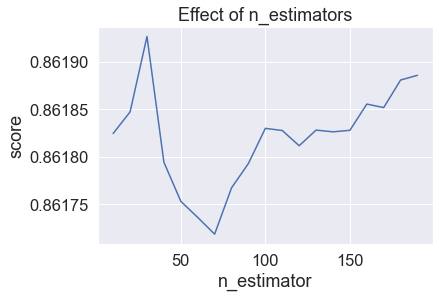

In [74]:
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model_rf.set_params(n_estimators=n)
    model_rf.fit(X_train, y_train)
    scores.append(model_rf.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [ ]:
scores

In [75]:
model_rf.score(X_test, y_test)

0.8618856317981071

In [76]:
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_test, rf_pred)
# print('accuracy: {}'.format(accuracy))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [77]:
# num_correct_samples = accuracy_score(y_test, rf_pred, normalize=False)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, average_precision_score

In [ ]:
# cm = pd.DataFrame(confusion_matrix(y_test, rf_pred), index = list(set(y)), columns = list(set(y))) 

In [ ]:
from sklearn.linear_model import Perceptron
pla = Perceptron().fit(X_train, y_train)
y_pred = pla.predict(X_test)
print(accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
model = GaussianNB()
model.fit(X_train, y_train)

y_G_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_G_pred)
num_correct_samples = accuracy_score(y_test,  y_G_pred, normalize=False)


print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))

In [ ]:
from sklearn.linear_model  import LogisticRegression
model=LogisticRegression(max_iter = 2000)
model.fit(x_train,y_train) # 訓練資料

y_L_pred = model.predict(x_test) #預測
accuracy = model.score(x_test, y_L_pred) # = predict + accuracy_score ( from sklearn.metrics import accuracy_score)
# accuracy = accuracy_score(y_test,y_pred)

print(accuracy)

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model  import LogisticRegression
model_sv = SVC(kernel='linear')
model_sv.fit(X_train, y_train)

y_S_pred = model_sv.predict(X_test)

accuracy_= model_sv.score(X_test, y_test)
accuracy = accuracy_score(y_test, y_S_pred)
num_correct_samples = accuracy_score(y_test,y_S_pred, normalize=False)

print('number of correct sample: {}'.format(num_correct_samples))
print('SVCaccuracy: {}'.format(accuracy))
print(accuracy_)

In [ ]:
# df_final.to_csv(r'final_no_onehot.csv')